In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [2]:
data = pd.read_csv('data.csv', encoding='latin1')
data1 = data.copy()

In [3]:
data.columns

Index(['1 Bienes', '1 Servicios', '2 Producción', '2 Logística', '2 TIC',
       '2 Administración', '2 Organización', '2 RRHH', '2 Marketing',
       '3 I+D interna', '3 I+D externa', '3 Activos', '3 Conocimiento externo',
       '3 Capacitación', '3 Marketing', '3 Diseño', '3 Puesta a punto',
       '3 Otras', '4 Tecnología', '4 Preferencias de consumidores',
       '4 Modelo de negocio', '4 Mercado', '4 Expansión', '4 Costos',
       '4 Competencia', '4 Estrategia', '4 Cultura', '4 Regulación',
       '4 Incentivos del gobierno', '5 Impactos', '6 Financiamiento externo',
       '6 Financiamiento interno', '6 Financiamiento público',
       '6 Costo muy alto', '6 Habilidades y conocimiento', '6 Cultura',
       '6 Tiempo', '6 Aversión al riesgo', '6 Prioridades',
       '6 Demanda incierta', '6 Demanda nula', '6 Competencia', '6 Partners',
       '6 Proveedores', '6 Regulación', '7 Activos', '7 Conocimiento externo',
       '7 Capacitación', '7 Marketing', '7 Diseño', '7 Puesta a pun

In [4]:
def ftable(df):
    a = df.value_counts()
    b = df.value_counts(normalize=True).round(2)
    c = pd.concat([a,b], axis=1)
    c.columns = ['n', '%']
    return c

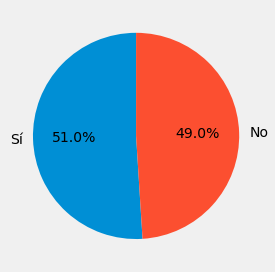

,n,%
Sí,152,0.51
No,148,0.49


In [14]:
table = ftable(data['1 Bienes'])

fig = plt.figure()
plt.pie(table['%'], labels=table.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.tight_layout()
plt.show()

fig.savefig("grafico1.png")
table.to_csv("table1.csv", encoding="latin1")
table

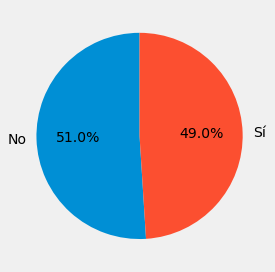

,n,%
No,154,0.51
Sí,146,0.49


In [15]:
table = ftable(data['1 Servicios'])

fig = plt.figure()
plt.pie(table['%'], labels=table.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.tight_layout()
plt.show()

fig.savefig("grafico2.png")
table.to_csv("table2.csv", encoding="latin1")
table

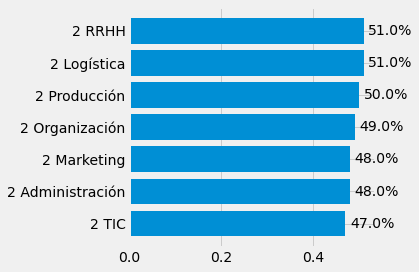

2 TIC               0.47
2 Administración    0.48
2 Marketing         0.48
2 Organización      0.49
2 Producción        0.50
2 Logística         0.51
2 RRHH              0.51
dtype: float64

In [17]:
variables = ['2 Producción', '2 Logística', '2 TIC', '2 Administración', '2 Organización', '2 RRHH', '2 Marketing']
codigo = {'Sí' : 1, 'No': 0}
table = data[variables].replace(codigo).mean().round(2).sort_values()

fig = plt.figure()
bars = plt.barh(table.index, table)
for y, x in enumerate(table):
    plt.annotate(str(x*100) + '%', xy=(x + 0.01, y), va='center')
plt.tight_layout()
plt.show()

fig.savefig("grafico3.png")
table.to_csv("table3.csv", encoding="latin1")
table

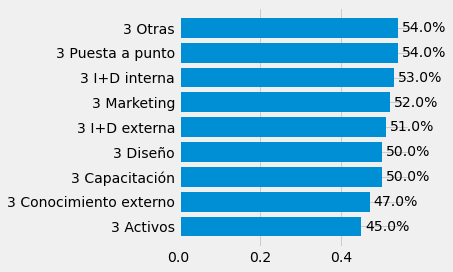

3 Activos                 0.45
3 Conocimiento externo    0.47
3 Capacitación            0.50
3 Diseño                  0.50
3 I+D externa             0.51
3 Marketing               0.52
3 I+D interna             0.53
3 Puesta a punto          0.54
3 Otras                   0.54
dtype: float64

In [36]:
variables = ['3 I+D interna', '3 I+D externa', '3 Activos', '3 Conocimiento externo', '3 Capacitación', '3 Marketing', '3 Diseño', '3 Puesta a punto', '3 Otras']
codigo = {'Sí' : 1, 'No': 0}
table = data[variables].replace(codigo).mean().round(2).sort_values()

plt.figure()
bars = plt.barh(table.index, table)
plt.tight_layout()
for y, x in enumerate(table):
    plt.annotate(str(x*100) + '%', xy=(x + 0.01, y), va='center')
plt.show()

fig.savefig("grafico4.png")
table.to_csv("table4.csv", encoding="latin1")
table

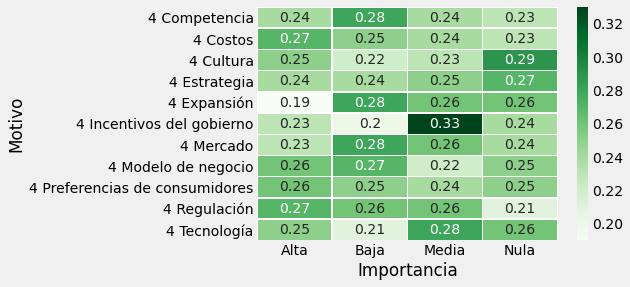

Importancia,Alta,Baja,Media,Nula
Motivo,,,,
4 Competencia,0.24,0.28,0.24,0.23
4 Costos,0.27,0.25,0.24,0.23
4 Cultura,0.25,0.22,0.23,0.29
4 Estrategia,0.24,0.24,0.25,0.27
4 Expansión,0.19,0.28,0.26,0.26
4 Incentivos del gobierno,0.23,0.20,0.33,0.24
4 Mercado,0.23,0.28,0.26,0.24
4 Modelo de negocio,0.26,0.27,0.22,0.25
4 Preferencias de consumidores,0.26,0.25,0.24,0.25


In [39]:
variables = ['4 Tecnología', '4 Preferencias de consumidores', '4 Modelo de negocio', '4 Mercado', '4 Expansión', '4 Costos', '4 Competencia', '4 Estrategia', '4 Cultura', '4 Regulación', '4 Incentivos del gobierno']

table = data[variables].melt()
table.columns = ['Motivo', 'Importancia']
table = pd.crosstab(table['Motivo'], table['Importancia'], normalize='index').round(2)

fig = plt.figure()
sns.heatmap(table, cmap='Greens', annot=True, linewidths=.5)
plt.show()

fig.savefig("grafico5.png", bbox_inches = "tight")
table.to_csv("table5.csv", encoding="latin1")
table

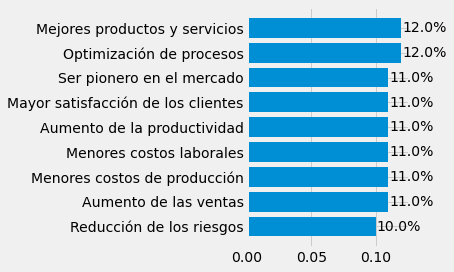

Reducción de los riesgos              0.10
Aumento de las ventas                 0.11
Menores costos de producción          0.11
Menores costos laborales              0.11
Aumento de la productividad           0.11
Mayor satisfacción de los clientes    0.11
Ser pionero en el mercado             0.11
Optimización de procesos              0.12
Mejores productos y servicios         0.12
dtype: float64

In [42]:
table = data['5 Impactos'].apply(literal_eval)
table = table.apply(pd.Series).stack().reset_index(drop = True)
table = table.value_counts(normalize=True).round(2).sort_values()

fig = plt.figure()
bars = plt.barh(table.index, table)
plt.tight_layout()
for y, x in enumerate(table):
    plt.annotate(str(x*100) + '%', xy=(x + 0.001, y), va='center')
plt.show()

fig.savefig("grafico6.png", bbox_inches = "tight")
table.to_csv("table6.csv", encoding="latin1")
table

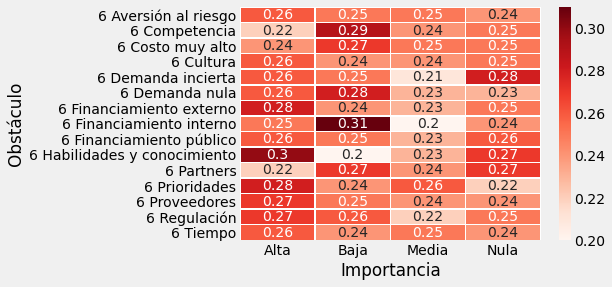

Importancia,Alta,Baja,Media,Nula
Obstáculo,,,,
6 Aversión al riesgo,0.26,0.25,0.25,0.24
6 Competencia,0.22,0.29,0.24,0.25
6 Costo muy alto,0.24,0.27,0.25,0.25
6 Cultura,0.26,0.24,0.24,0.25
6 Demanda incierta,0.26,0.25,0.21,0.28
6 Demanda nula,0.26,0.28,0.23,0.23
6 Financiamiento externo,0.28,0.24,0.23,0.25
6 Financiamiento interno,0.25,0.31,0.20,0.24
6 Financiamiento público,0.26,0.25,0.23,0.26


In [45]:
variables = ['6 Financiamiento externo', '6 Financiamiento interno', '6 Financiamiento público', '6 Costo muy alto', '6 Habilidades y conocimiento', '6 Cultura', '6 Tiempo', '6 Aversión al riesgo', '6 Prioridades', '6 Demanda incierta', '6 Demanda nula', '6 Competencia', '6 Partners', '6 Proveedores', '6 Regulación']

table = data[variables].melt()
table.columns = ['Obstáculo', 'Importancia']
table = pd.crosstab(table['Obstáculo'], table['Importancia'], normalize='index').round(2)

fig = plt.figure()
sns.heatmap(table, cmap='Reds', annot=True, linewidths=.5)
plt.show()

fig.savefig("grafico7.png", bbox_inches = "tight")
table.to_csv("table7.csv", encoding="latin1")
table

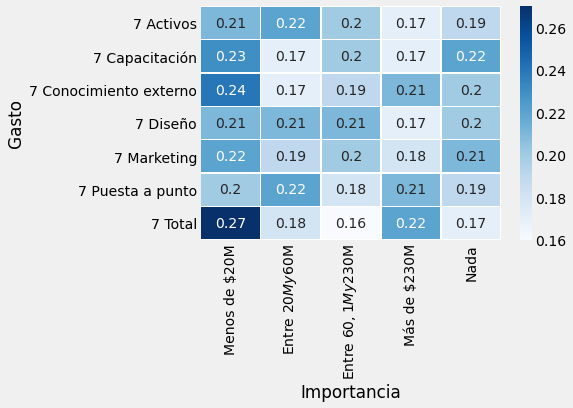

Importancia,Menos de $20M,Entre $20M y $60M,"Entre $60,1M y $230M",Más de $230M,Nada
Gasto,,,,,
7 Activos,0.21,0.22,0.20,0.17,0.19
7 Capacitación,0.23,0.17,0.20,0.17,0.22
7 Conocimiento externo,0.24,0.17,0.19,0.21,0.20
7 Diseño,0.21,0.21,0.21,0.17,0.20
7 Marketing,0.22,0.19,0.20,0.18,0.21
7 Puesta a punto,0.20,0.22,0.18,0.21,0.19
7 Total,0.27,0.18,0.16,0.22,0.17


In [115]:
variables = ['7 Activos', '7 Conocimiento externo', '7 Capacitación', '7 Marketing', '7 Diseño', '7 Puesta a punto', '7 Total']

table = data[variables].melt()
table.columns = ['Gasto', 'Importancia']
table = pd.crosstab(table['Gasto'], table['Importancia'], normalize='index').round(2)
table = table[['Menos de $20M', 'Entre $20M y $60M', 'Entre $60,1M y $230M', 'Más de $230M', 'Nada']]

fig = plt.figure()
sns.heatmap(table, cmap='Blues', annot=True, linewidths=.5)
plt.show()

fig.savefig("grafico8.png", bbox_inches = "tight")
table.to_csv("table8.csv", encoding="latin1")
table

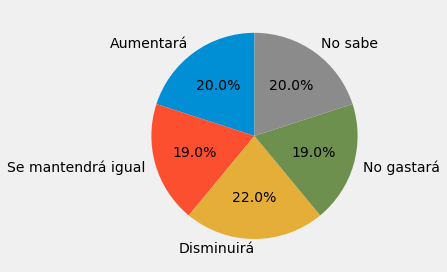

,n,%
Aumentará,60,0.20
Se mantendrá igual,58,0.19
Disminuirá,65,0.22
No gastará,57,0.19
No sabe,60,0.20


In [116]:
table = ftable(data['8 Cambio gasto total'])
table = table.loc[['Aumentará', 'Se mantendrá igual', 'Disminuirá', 'No gastará', 'No sabe']]

fig = plt.figure()
plt.pie(table['%'], labels=table.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.tight_layout()
plt.show()

fig.savefig("grafico9.png", bbox_inches = "tight")
table.to_csv("table9.csv", encoding="latin1")
table

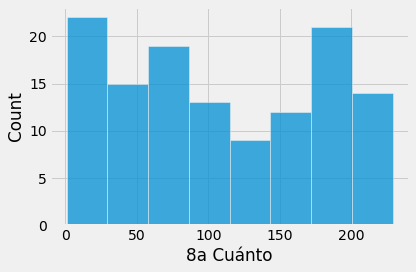

In [64]:
table = data['8a Cuánto']

fig = plt.figure()
sns.histplot(table)
plt.tight_layout()
plt.show()

fig.savefig("grafico10.png", bbox_inches = "tight")
pd.DataFrame(table.describe().round(0)).to_csv("table10.csv", encoding="latin1")

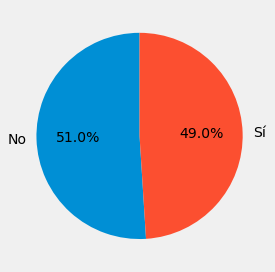

,n,%
No,153,0.51
Sí,147,0.49


In [65]:
table = ftable(data['9 Innovación institucionalizada'])

fig = plt.figure()
plt.pie(table['%'], labels=table.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.tight_layout()
plt.show()

fig.savefig("grafico11.png", bbox_inches = "tight")
table.to_csv("table11.csv", encoding="latin1")
table


In [150]:
table = data[['10 Entre 1 y 6 meses', '10 Entre 7 y 12 meses', '10 Entre 1 y 2 años', '10 Más de 2 años',]]
# table.columns = ['1 Entre 1 y 6 meses', '2 Entre 7 y 12 meses', '3 Entre 1 y 2 años', '4 Más de 2 años']
table = table.melt()
table.columns = ['Tiempo', 'Tipo de innovación']
table = table[table['Tipo de innovación'].notna()]
table = table[table['Tipo de innovación'] != '[]']
table['Tipo de innovación'] = table['Tipo de innovación'].apply(literal_eval)
table = table.explode('Tipo de innovación')
table = pd.crosstab(table['Tiempo'], table['Tipo de innovación'], normalize='index').round(2)
table.to_csv("table12.csv", encoding="latin1")
table

Tipo de innovación,Innovación de procesos,Innovación de productos
Tiempo,,
10 Entre 1 y 2 años,0.52,0.48
10 Entre 1 y 6 meses,0.45,0.55
10 Entre 7 y 12 meses,0.50,0.50
10 Más de 2 años,0.54,0.46


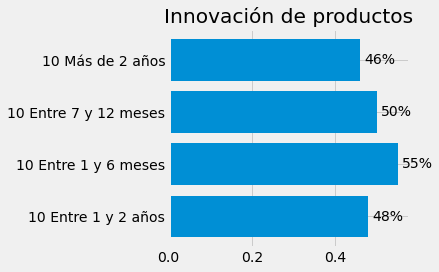

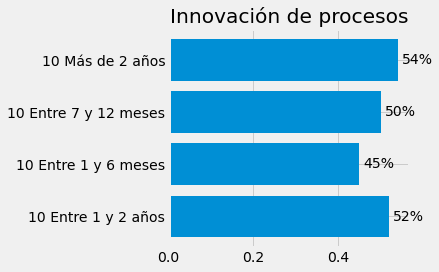

In [164]:
fig = plt.figure()
bars = plt.barh(table[['Innovación de productos']].index, 'Innovación de productos', data=table[['Innovación de productos']])
plt.title("Innovación de productos")
plt.tight_layout()
for y, x in enumerate(table['Innovación de productos']):
    plt.annotate(str(round(x*100)) + '%', xy=(x + 0.01, y), va='center')
plt.show()

fig.savefig("grafico12a.png", bbox_inches = "tight")

fig = plt.figure()
bars = plt.barh(table[['Innovación de procesos']].index, 'Innovación de procesos', data=table[['Innovación de procesos']])
plt.title("Innovación de procesos")
plt.tight_layout()
for y, x in enumerate(table['Innovación de procesos']):
    plt.annotate(str(round(x*100)) + '%', xy=(x + 0.01, y), va='center')
plt.show()

fig.savefig("grafico12b.png", bbox_inches = "tight")

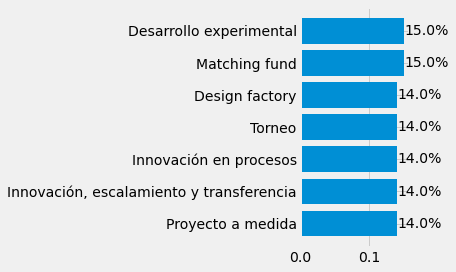

Proyecto a medida                           0.14
Innovación, escalamiento y transferencia    0.14
Innovación en procesos                      0.14
Torneo                                      0.14
Design factory                              0.14
Matching fund                               0.15
Desarrollo experimental                     0.15
dtype: float64

In [165]:
table = data['11 Colaboración']
table = table.apply(literal_eval)
table = table.apply(pd.Series).stack().reset_index(drop = True)
table = table.value_counts(normalize=True).round(2).sort_values()


fig = plt.figure()
bars = plt.barh(table.index, table)
plt.tight_layout()
for y, x in enumerate(table):
    plt.annotate(str(round(x*100, 1)) + '%', xy=(x + 0.001, y), va='center')
plt.show()

fig.savefig("grafico13.png", bbox_inches = "tight")
table.to_csv("table13.csv", encoding="latin1")
table

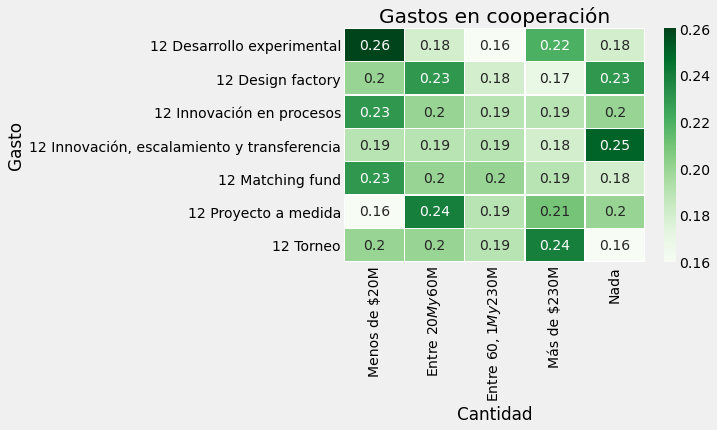

Cantidad,Menos de $20M,Entre $20M y $60M,"Entre $60,1M y $230M",Más de $230M,Nada
Gasto,,,,,
12 Desarrollo experimental,0.26,0.18,0.16,0.22,0.18
12 Design factory,0.20,0.23,0.18,0.17,0.23
12 Innovación en procesos,0.23,0.20,0.19,0.19,0.20
"12 Innovación, escalamiento y transferencia",0.19,0.19,0.19,0.18,0.25
12 Matching fund,0.23,0.20,0.20,0.19,0.18
12 Proyecto a medida,0.16,0.24,0.19,0.21,0.20
12 Torneo,0.20,0.20,0.19,0.24,0.16


In [188]:
variables = ['12 Innovación en procesos', '12 Design factory', '12 Torneo', '12 Desarrollo experimental', '12 Innovación, escalamiento y transferencia', '12 Matching fund', '12 Proyecto a medida']

table = data[variables].melt()
table.columns = ['Gasto', 'Cantidad']
table = pd.crosstab(table['Gasto'], table['Cantidad'], normalize='index').round(2)
table = table[['Menos de $20M', 'Entre $20M y $60M', 'Entre $60,1M y $230M', 'Más de $230M', 'Nada']]

fig = plt.figure()
sns.heatmap(table, cmap='Greens', annot=True, linewidths=.5)
plt.title('Gastos en cooperación')
plt.show()

fig.savefig("grafico14.png", bbox_inches = "tight")
table.to_csv("table14.csv", encoding="latin1")
table

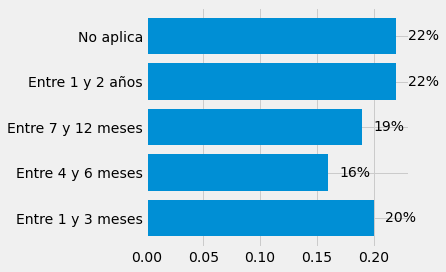

,n,%
Entre 1 y 3 meses,59,0.20
Entre 4 y 6 meses,49,0.16
Entre 7 y 12 meses,58,0.19
Entre 1 y 2 años,67,0.22
No aplica,67,0.22


In [191]:
table = ftable(data['13 Tiempo cooperación'])
table = table.loc[['Entre 1 y 3 meses', 'Entre 4 y 6 meses', 'Entre 7 y 12 meses', 'Entre 1 y 2 años', 'No aplica', ]]

fig = plt.figure()
bars = plt.barh(table[['%']].index, '%', data=table[['%']])
plt.tight_layout()
for y, x in enumerate(table['%']):
    plt.annotate(str(round(x*100)) + '%', xy=(x + 0.01, y), va='center')
plt.show()

fig.savefig("grafico15.png", bbox_inches = "tight")
table.to_csv("table15.csv", encoding="latin1")
table

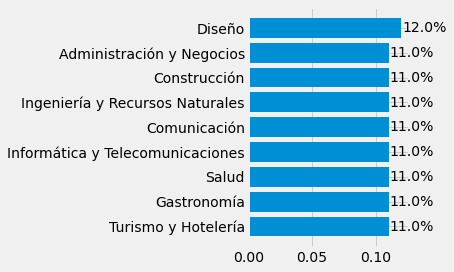

Turismo y Hotelería                 0.11
Gastronomía                         0.11
Salud                               0.11
Informática y Telecomunicaciones    0.11
Comunicación                        0.11
Ingeniería y Recursos Naturales     0.11
Construcción                        0.11
Administración y Negocios           0.11
Diseño                              0.12
dtype: float64

In [195]:
table = data['14 Escuelas']
table = table.apply(literal_eval)
table = table.apply(pd.Series).stack().reset_index(drop = True)
table = table.value_counts(normalize=True).round(2).sort_values()

fig = plt.figure()
bars = plt.barh(table.index, table)
plt.tight_layout()
for y, x in enumerate(table):
    plt.annotate(str(round(x*100, 1)) + '%', xy=(x + 0.001, y), va='center')
plt.show()

fig.savefig("grafico16.png", bbox_inches = "tight")
table.to_csv("table16.csv", encoding="latin1")
table